# 1. Swedish demographic data (*)
Go to Swedish-language wikipedia page Sveriges demografi.

  ## a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [1]:
import pandas as pd

tables = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=',', thousands=' ', header=[0])
df = tables[5]
df = df.rename(columns={"Unnamed: 0": "År"})
df

,År,Folkmängd,Födda,Döda,Befolkningsförändringar,Nativiteten (per 1000),Dödstalen (per 1000),Befolkningsförändringar (per 1000),Total fertilitet
0,1900,5117000,138139,86146,51993,27.0,16.8,10.2,4.02
1,1901,5156000,139370,82772,56598,27.0,16.1,11.0,4.04
2,1902,5187000,137364,79722,57642,26.5,15.4,11.1,3.95
3,1903,5210000,133896,78610,55286,25.7,15.1,10.6,3.82
4,1904,5241000,134952,80152,54800,25.7,15.3,10.5,3.83
...,...,...,...,...,...,...,...,...,...
116,2016,9995000,117425,90982,26443,11.8,9.2,2.6,1.85
117,2017,10120000,115416,91972,23444,11.4,9.1,2.3,1.79
118,2018,10230000,115832,92185,23647,11.3,9.0,2.3,1.75
119,2019,10327589,114523,88766,28727,11.1,8.7,2.4,1.70


## b) Choose to do some EDA (exploratory data analysis) on this dataset. And draw some relevant graphs.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   År                                  121 non-null    int64  
 1   Folkmängd                           121 non-null    int64  
 2   Födda                               121 non-null    int64  
 3   Döda                                121 non-null    int64  
 4   Befolkningsförändringar             121 non-null    int64  
 5   Nativiteten (per 1000)              121 non-null    float64
 6   Dödstalen (per 1000)                121 non-null    float64
 7   Befolkningsförändringar (per 1000)  121 non-null    float64
 8   Total fertilitet                    121 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 8.6 KB


Text(0.5, 1.0, 'Befolkningsförändringar vs year')

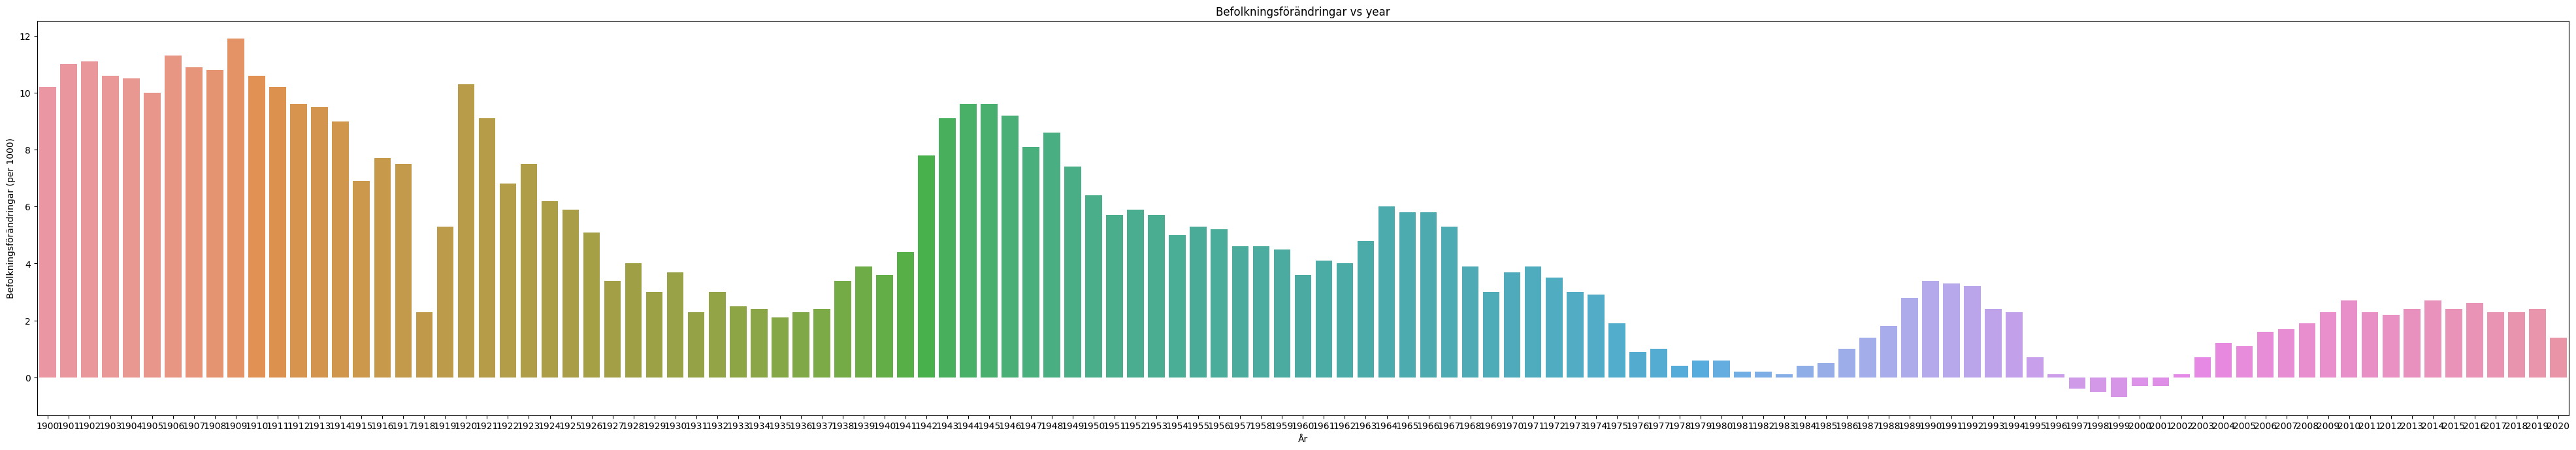

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


df.describe()
df.info()


fig = plt.figure(dpi=100, figsize=(50,8))
sns.barplot(data=df, y="Befolkningsförändringar (per 1000)", x="År").set_title("Befolkningsförändringar vs year")

## c) Now we want to go backwards in time (before 1900) to see how population has changed in Sweden. Read in the table under history and keep the data of "Folkmängd" from 1570-1865.

In [3]:
tables = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=',', thousands='\xa0', header=[1])
df_1900 = tables[1]

df_1900 = df_1900.iloc[:,0:2]
df_1900 = df_1900.loc[lambda df_1900: df_1900["Vid utgången av år"] <= "1865"]
df_1900 = df_1900.rename(columns={"Vid utgången av år": "År"})
df_1900 = df_1900.astype("int64")
df_1900.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   År         7 non-null      int64
 1   Folkmängd  7 non-null      int64
dtypes: int64(2)
memory usage: 168.0 bytes


## d) Now concatenate this with the table from 1900 so that you have population data from 1570 to 2020. Note that you may need to clean the data in order for it to fit properly. Also you may be able to do this in several ways.

In [4]:
df = df.iloc[:,0:2]
df

df_new = pd.concat([df_1900, df], ignore_index=True)
df_new.info(), df_new

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   År         128 non-null    int64
 1   Folkmängd  128 non-null    int64
dtypes: int64(2)
memory usage: 2.1 KB


(None,
        År  Folkmängd
 0    1570     900000
 1    1650    1225000
 2    1700    1485000
 3    1720    1350000
 4    1755    1878000
 ..    ...        ...
 123  2016    9995000
 124  2017   10120000
 125  2018   10230000
 126  2019   10327589
 127  2020   10379295
 
 [128 rows x 2 columns])

## e) Draw a graph of population data from 1570-2020.

In [5]:
import plotly_express as px 

fig = px.line(df_new, x="År", y="Folkmängd", title="Population change 1570 - 2020")
                 
fig.show()

# 2. Denmark demographic data (*)

## Go to the Danish-language wikipedia page Danmarks demografi.

  a) Read in the table under "Demografiske data" into a DataFrame (*)

In [6]:
table = pd.read_html("https://da.wikipedia.org/wiki/Danmarks_demografi", decimal=',', thousands='.', header=[0])
danmark = table[0]
danmark


,År,Befolkning pr. 1. januar,År.1,Befolkning pr. 1. januar.1
0,800,500.000[5],NaN,NaN
1,1200,1.000.000[5],NaN,NaN
2,1769,797584,1976.0,5065313.0
3,1787,841806,1977.0,5079879.0
4,1801,929001,1978.0,5096959.0
5,1834,1230964,1979.0,5111537.0
6,1840,1289075,1980.0,5122065.0
7,1845,1356877,1981.0,5123989.0
8,1850,1414648,1982.0,5119155.0
9,1855,1507222,1983.0,5116464.0


## b) Clean the data and draw a graph of population against year from 1769-2020. (**)

In [7]:
danmark_1 = danmark.iloc[:, 0:2]
danmark_1 = danmark_1.drop([0,1])
danmark_1 = danmark_1.astype(int)
#danmark_1.info()


danmark_2 = danmark.iloc[:, 2:4]
danmark_2 = danmark_2.drop([0,1])
danmark_2 = danmark_2.replace("5,330,020", "5330020")
danmark_2 = danmark_2.astype(int)
danmark_2 = danmark_2.rename(columns={"År.1": "År", "Befolkning pr. 1. januar.1": "Befolkning pr. 1. januar"})
#danmark_2.info()

danmark_new = pd.concat([danmark_1, danmark_2], ignore_index=True)
danmark_new



,År,Befolkning pr. 1. januar
0,1769,797584
1,1787,841806
2,1801,929001
3,1834,1230964
4,1840,1289075
...,...,...
59,2003,5383507
60,2005,5411405
61,2010,5534738
62,2015,5659715


# 3. Norwegian demographic data

Go to Swedish-language wikipedia page Norges demografi.

  a) Read in the table under "Befolkningsstatistik sedan 1900" into a DataFrame

In [8]:
table_norge = pd.read_html("https://sv.wikipedia.org/wiki/Norges_demografi", decimal=',', thousands=' ', header=[0])

norge = table_norge[2]
norge


,Unnamed: 0,Befolkning i tusentals (x 1000),Födda,Döda,Naturlig förändring,Födelsetal per 1000 invånare,Dödstal per 1000 invånare,Naturlig förändring per 1000 invånare,Total fertilitet
0,1900,2231,66229,35345,30884,29.7,15.8,13.8,NaN
1,1901,2255,67303,33821,33482,29.8,15.0,14.8,NaN
2,1902,2276,66494,31670,34824,29.2,13.9,15.3,NaN
3,1903,2288,65470,33847,31623,28.6,14.8,13.8,NaN
4,1904,2298,64143,32895,31248,27.9,14.3,13.6,NaN
...,...,...,...,...,...,...,...,...,...
108,2008,4768,60497,41712,18785,12.7,8.7,3.9,1.96
109,2009,4829,61807,41449,20358,12.8,8.6,4.2,1.98
110,2010,4889,61442,41500,19942,12.6,8.5,4.1,1.95
111,2011,4953,60220,41393,18827,12.1,8.3,3.8,1.88


 ##  b) You see some missing data in column "Total fertilitet". Go to the English page and read in the data from "Vital statistics since 1900".



In [9]:
table_norge_en = pd.read_html("https://en.wikipedia.org/wiki/Demographics_of_Norway",  thousands=',', header=[0])

norge_en = table_norge_en[13]
norge_en = norge_en.drop([121]) # 2021 years data is missing
norge_en

,Unnamed: 0,Average population,Live births,Deaths,Natural change,Crude birth rate (per 1000),Crude death rate (per 1000),Natural change (per 1000),Total fertility rates[fn 1][5][7]
0,1900,2231000,66229.0,35345.0,30884.0,29.7,15.8,13.8,4.40
1,1901,2255000,67303.0,33821.0,33482.0,29.8,15.0,14.8,4.37
2,1902,2276000,66494.0,31670.0,34824.0,29.2,13.9,15.3,4.26
3,1903,2288000,65470.0,33847.0,31623.0,28.6,14.8,13.8,4.16
4,1904,2298000,64143.0,32895.0,31248.0,27.9,14.3,13.6,4.07
...,...,...,...,...,...,...,...,...,...
116,2016,5213000,58890.0,40726.0,18164.0,11.3,7.8,3.5,1.71
117,2017,5258000,56633.0,40774.0,15859.0,10.8,7.8,3.0,1.62
118,2018,5296000,55120.0,40840.0,14280.0,10.4,7.7,2.8,1.56
119,2019,5328000,54495.0,40684.0,13811.0,10.2,7.6,2.6,1.53


## c) Pick out the fertility column from b) dataset, merge it into a) dataset and clean the data so that you only have columns "År", "Folkmängd", "Fertilitet".



In [10]:
norge_2 = norge_en.iloc[:, [0,8]]
norge_2 = norge_2.rename(columns={"Unnamed: 0": "År", "Total fertility rates[fn 1][5][7]": "Fertilitet"})

norge = norge.iloc[:, 0:2]
norge = norge.rename(columns={"Unnamed: 0": "År", "Befolkning i tusentals (x 1000)": "Folkmängd"})

norge = norge.merge(norge_2)
norge

,År,Folkmängd,Fertilitet
0,1900,2231,4.40
1,1901,2255,4.37
2,1902,2276,4.26
3,1903,2288,4.16
4,1904,2298,4.07
...,...,...,...
108,2008,4768,1.96
109,2009,4829,1.98
110,2010,4889,1.95
111,2011,4953,1.88


# 4. Merge Sweden-Norway (*)
Create a population graph and a fertility graph showing Sweden and Norway.

Text(0.5, 1.0, 'Fertility Norge')

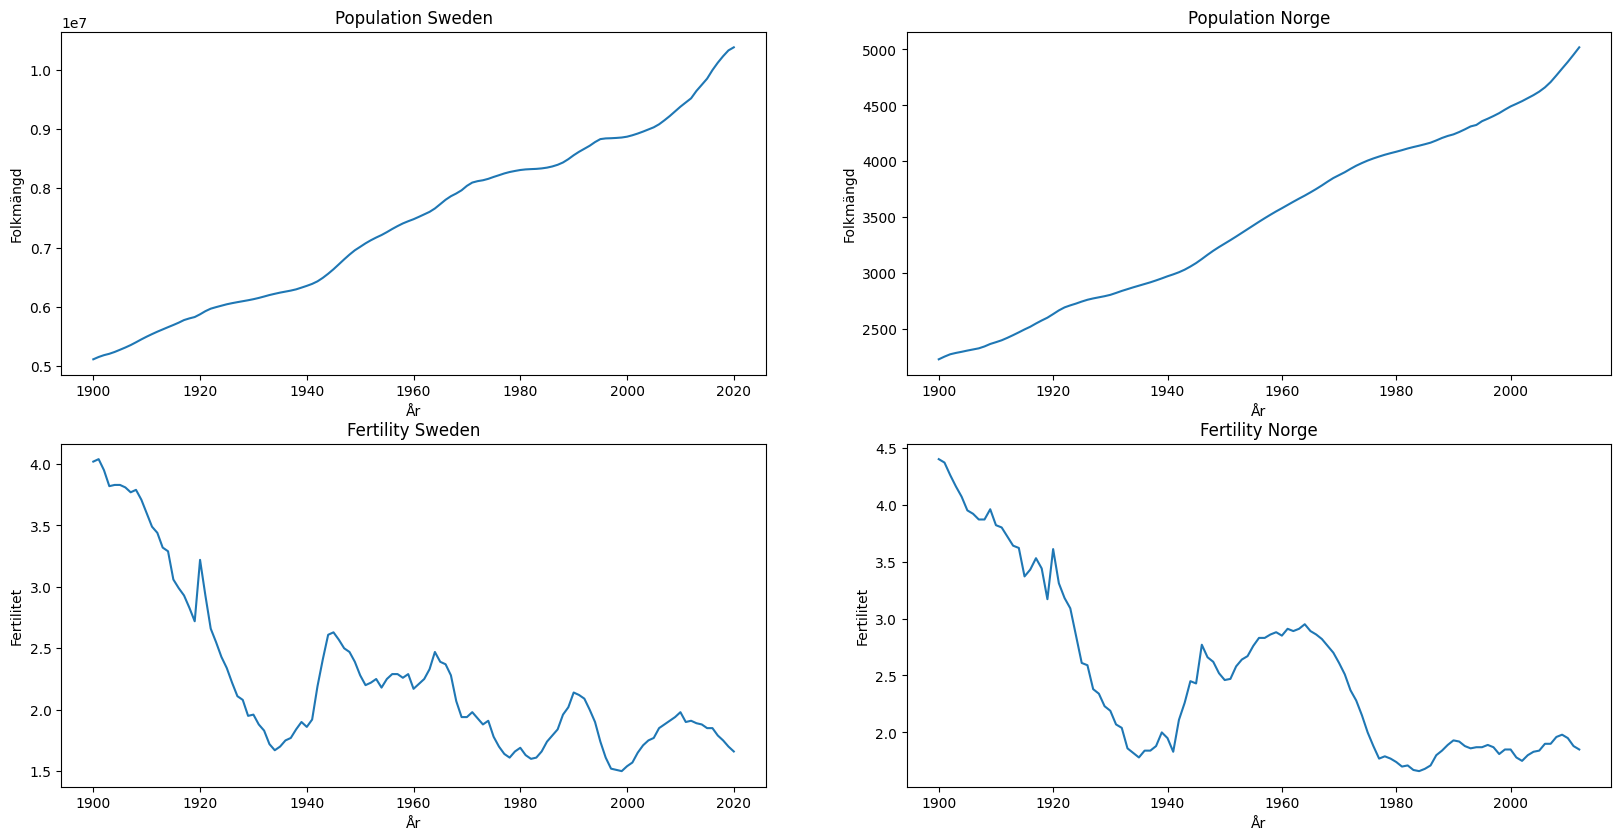

In [26]:
tables = pd.read_html("https://sv.wikipedia.org/wiki/Sveriges_demografi", decimal=',', thousands=' ', header=[0])
sweden = tables[5]
sweden = sweden.rename(columns={"Unnamed: 0": "År", "Total fertilitet": "Fertilitet"})

fig, ax = plt.subplots(2,2, dpi=100, figsize=(20,10))

sns.lineplot(data=sweden, x="År", y="Folkmängd", ax = ax[0,0]).set_title("Population Sweden")
sns.lineplot(data=sweden, x="År", y="Fertilitet", ax = ax[1,0]).set_title("Fertility Sweden")

sns.lineplot(data=norge, x="År", y="Folkmängd", ax = ax[0,1]).set_title("Population Norge")
sns.lineplot(data=norge, x="År", y="Fertilitet", ax = ax[1,1]).set_title("Fertility Norge")

